# Sentiment Analysis for Movie Reviews

## 1. Load the Data

In [7]:
import pandas as pd

# Load the data
imdb = pd.read_csv('./dataset/IMDB_Dataset.csv')

# Check the first few rows
print(imdb.head())
print('---')

# Check the shape of the dataset
print(imdb.shape)
print('---')

# Information about the dataset
print(imdb.info())
print('---')

# Describe the dataset
print(imdb.describe())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
---
(50000, 2)
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
---
                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq            

## 2. Check for Duplicates and Missing Values

In [8]:
# Check for duplicates
duplicates = imdb.duplicated().sum()
print(f"Number of duplicate reviews: {duplicates}")

# Remove duplicates if any
imdb = imdb.drop_duplicates()

# Recheck the shape after removing duplicates
print(imdb.shape)

Number of duplicate reviews: 418
(49582, 2)


## 3. Exploratory Data Analysis (EDA)

### Sentiment Distribution

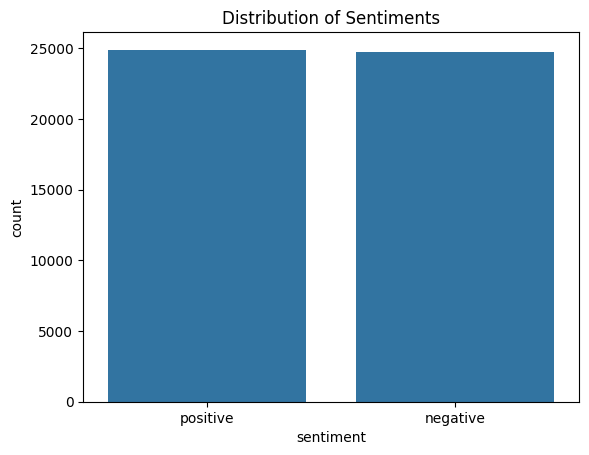

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiments
sns.countplot(x='sentiment', data=imdb)
plt.title("Distribution of Sentiments")
plt.show()

### Text Preprocessing

In [10]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(review):
    review = review.lower()  # Lowercase
    review = re.sub('<.*?>', '', review)  # Remove HTML tags
    review = re.sub('[^a-zA-Z]', ' ', review)  # Remove special characters
    tokens = word_tokenize(review)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Apply preprocessing to reviews
imdb['clean_review'] = imdb['review'].apply(preprocess_text)

# View the cleaned data
print(imdb[['review', 'clean_review']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  


## 4. Baseline Model

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convert text data into numerical using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(imdb['clean_review']).toarray()

# Target labels (positive/negative)
y = imdb['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 5. Model Evaluation

In [12]:
# Evaluate the model
y_pred = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8871260504201681
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7404
           1       0.88      0.90      0.89      7471

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



## 6. Improve the model

### Using Naive Bayes

In [13]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate Naive Bayes
y_pred_nb = nb.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8542521008403361
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      7404
           1       0.85      0.86      0.86      7471

    accuracy                           0.85     14875
   macro avg       0.85      0.85      0.85     14875
weighted avg       0.85      0.85      0.85     14875



### Using Deep Learning (LSTM)

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(imdb['clean_review'])
X_seq = tokenizer.texts_to_sequences(imdb['clean_review'])
X_pad = pad_sequences(X_seq, maxlen=200)

# Split the data
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(X_pad, y, test_size=0.3, random_state=42)

# Build the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_pad, epochs=5, batch_size=128, validation_data=(X_test_pad, y_test_pad))

# Evaluate LSTM
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")
print(f"LSTM Accuracy: {accuracy_score(y_test_pad, y_pred_lstm)}")
print(classification_report(y_test_pad, y_pred_lstm))

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 273s 970ms/step - accuracy: 0.7579 - loss: 0.4774 - val_accuracy: 0.8635 - val_loss: 0.3165
Epoch 2/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.9048 - loss: 0.2449 - val_accuracy: 0.8773 - val_loss: 0.3079
Epoch 3/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.9216 - loss: 0.2001 - val_accuracy: 0.8760 - val_loss: 0.3209
Epoch 4/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9340 - loss: 0.1731 - val_accuracy: 0.8690 - val_loss: 0.3443
Epoch 5/5
272/272 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.9506 - loss: 0.1404 - val_accuracy: 0.8573 - val_loss: 0.4081
465/465 ━━━━━━━━━━━━━━━━━━━━ 53s 112ms/step
LSTM Accuracy: 0.8572773109243698
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      7404
           1       0.81      0.93      0.87      7471

    accuracy                           0.86     14875
   macro avg       0.87      0.86      0.86     14875
weighte

## 7. Simplify and Finalize the Model

After evaluating three different models—Logistic Regression, Naive Bayes, and Long Short-Term Memory (LSTM)—we observe the following performance metrics:

**Logistic Regression**:

Accuracy: 0.8871
Precision (0 class): 0.89, (1 class): 0.88
Recall (0 class): 0.88, (1 class): 0.90
F1-score (0 class): 0.89, (1 class): 0.89
Logistic Regression performs well with balanced precision and recall for both classes, achieving a nearly 89% accuracy.

**Naive Bayes**:

Accuracy: 0.8543
Precision (0 class): 0.86, (1 class): 0.85
Recall (0 class): 0.85, (1 class): 0.86
F1-score (0 class): 0.85, (1 class): 0.86
Naive Bayes shows a slightly lower performance compared to Logistic Regression, with an accuracy of 85.4%.

**LSTM (Long Short-Term Memory)**:

Accuracy: 0.8573
Precision (0 class): 0.92, (1 class): 0.81
Recall (0 class): 0.78, (1 class): 0.93
F1-score (0 class): 0.85, (1 class): 0.87


While **LSTM** achieved a slightly lower accuracy (85.7%) than Logistic Regression, it demonstrated a **significant improvement in class imbalance handling**. It had a **higher precision** for class 0 (92%) and a higher recall for class 1 (93%).

It excels in handling class imbalance, which is crucial for tasks like sentiment analysis where imbalanced data often occurs. It also captures temporal dependencies in text, making it a more powerful model for this task.


Thus, **LSTM** will be used as the final model for deployment, prioritizing its strength in precision and recall for the respective classes, especially in handling class imbalance and understanding sequential patterns in the text data.

## 8. Deployment

### Save the LSTM model

In [19]:
# Save the LSTM model
import os

# Directory where the model will be saved
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

# Save the model
model_path = os.path.join(model_dir, 'lstm_sentiment_model.keras')
model.save(model_path)
print(f"LSTM model saved at {model_path}")

LSTM model saved at models\lstm_sentiment_model.keras
